# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [11]:
# TODO
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics as sts


Hipótesis nula: la media 1 es igual a la media 2.
Hipótesis alternativa: la media 1 es diferente a la media 2.

In [2]:
diet_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

#Nivel de significación:

alpha = 0.05

#Elegir estadístico de prueba

T_stat, P_value = stats.ttest_ind(diet_1, diet_2)
print(T_stat, P_value)

#Comparo p value con alpha

if P_value <= alpha:
    print("La hipótesis nula se rechaza, por lo que la hipótesis alternativa es cierta")
else:
    print("La hipótesis nula no se rechaza")



-3.5383407969933938 0.004083270191713912
La hipótesis nula se rechaza, por lo que la hipótesis alternativa es cierta


## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

Hipótesis nula: los tres fertilizantes rinden igual. 
Hipótesis alternativa: los fertilizantes rinden de manera diferente.


In [3]:
fert_1 = [20, 21, 20, 19, 20]
fert_2 = [22, 21, 23, 22, 21]
fert_3 = [24, 23, 22, 23, 24]

alpha= 0.05

f_value, p_value = stats.f_oneway(fert_1, fert_2, fert_3)
print(f_value)
print(p_value)


20.31578947368421
0.000140478247931904


In [29]:
medias = {
    "Fertilizante 1": np.mean(fert_1),
    "Fertilizante 2": np.mean(fert_2),
    "Fertilizante 3": np.mean(fert_3)
}

print(medias)



{'Fertilizante 1': np.float64(20.0), 'Fertilizante 2': np.float64(21.8), 'Fertilizante 3': np.float64(23.2)}


"La hipótesis nula se rechaza ya que el p_value es menor que alpha= 0.05, por lo que los fertilizantes no rinden igual."

"Además, comprobamos al calcular la media de los tres fertilizantes, que el más eficiente es el tercero."

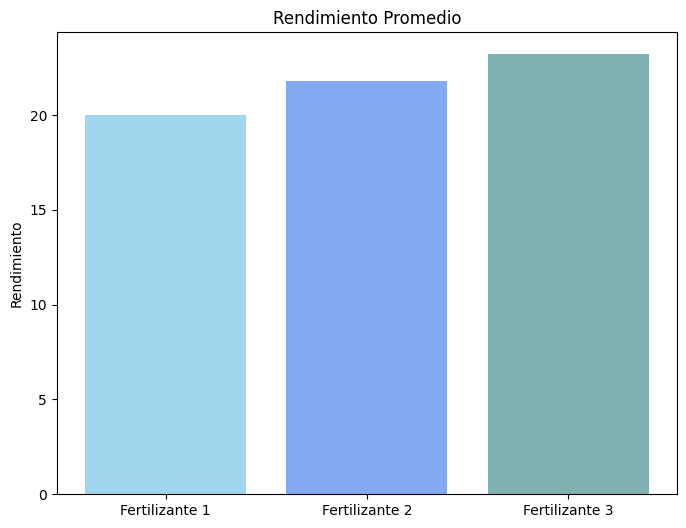

In [32]:
import matplotlib.pyplot as plt
import numpy as np

medias_fert= [20, 21.8, 23.2]
eje_x = ['Fertilizante 1', 'Fertilizante 2', 'Fertilizante 3']
colors = ['skyblue', 'cornflowerblue', 'cadetblue']

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(eje_x, medias_fert, capsize=8, color=colors, alpha=0.8)
ax.set_title('Rendimiento Promedio')
ax.set_ylabel('Rendimiento')

plt.show()


"En el gráfico de barras podemos observar visualmente las diferencias entre los tres"